# EDA FARS (Fatality Analysis Reporting System)

### What is this Dataset about?

<p>Data is for automobiles where the right passenger seat was occupied, with one observation for each such passenger. Observations for vehicles where the most harmful event was a fire or explosion or immersion or gas inhalation, or where someone fell or jumped from the vehicle, are omitted. Data is limited to vehicle body types 1 to 19,48,49,61, or 62. This excludes large trucks, pickup trucks, vans and buses. The 2009 and 2010 data does not include information on whether airbags were installed.
</p>

In [1]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
#helper functions
def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent="no", title="", figure_dim=(16,5)):
    total_rows = df.shape[0]
    plt.figure(figsize=figure_dim)
    plt.title(title)
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            total_p = (height*100)/totalrows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.1f} %'.format(percent) \
                    + ' \ ' + '{:1.1f} %'.format(total_p), ha='center')
def show_unique(column, df):
    
    print "There are {} unique values in column {}\n".format(str(len(df[column].unique())), column)

## File Structure

In [3]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)
totalrows = data.shape[0]

Data shape:
151158 Rows x 17 Columns


### Variables Defination

<p>There are total 17 variables present in this data-set, which can be divided in to following categories</p>
<p><b>Vehicle:</b></p>
<ul>
<li><b>caseid</b>: Vehicles ID</li>
<li><b>modelyr</b>: Vehicle's model year</li>
<li><b>inimpact</b>:Initial Impact of accident on vehicle (which car side was colided first).</li>
<li><b>airbag</b>: Type of air bag installed in car for ex. only front airbag</li>
<li><b>restraint</b>: type of seatbelts installed in car for ex. only shoulder seatbelt</li>
</ul>
<p><b>Passanger</b>:</p>
<ul>
<li><b>Age</b>: Passenger's Age</li>
<li><b>sex</b>: Passenger's gender</li>
<li><b>injury</b>: Category of passenger's Injury</li>
<li><b>airbagAvail</b>: Passanger's air bag availability.</li>
<li><b>airbagDeploy</b>: Passangers air bag doployment.</li>
<li><b>Restraint</b>: If passanger was wearnig seatbelt or not.</li>
</ul>
<p><b>Driver</b>:</p>
<ul>

<li><b>D_injury</b>: Driver injury category</li>
<li><b>D_airbagAvail</b>: If air bag was available for driver or not</li>
<li><b>D_airbagDeploy</b>: If air bag was deployed or not</li>
<li><b>D_Restraint</b>: If driver was wearing seatbelt or not</li>
</ul>
<p><b>Other</b>:</p>
<ul>
<li><b>state</b>: US State code where accident happend</li>
<li><b>year</b>: year of accident</li>

</ul>


## Let's explore variables of above categories. 

## Category Vehicle

### inimpact: location code of initial impact


In [4]:
inimpact_df = data[['inimpact']]
show_unique('inimpact', data)
print 'Unique categories in inimpact are following:'

There are 24 unique values in column inimpact

Unique categories in inimpact are following:


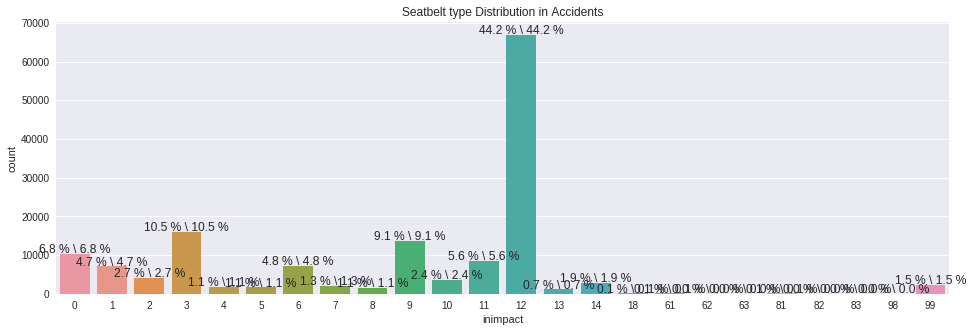

In [5]:
count_plot('inimpact', 'x', data, 'show', 'Seatbelt type Distribution in Accidents')

We can see that in most of the cases initial point of impact was **12 (front)** and then **9 (Driver Side)** and **3 (Passenger Side)** 
 
Desc | Img
- | -
![alt](img/inimpact.png)|![alt](img/inpact2.png)

### airbag: Type of air bag installed in car for ex. only front airbag

There are 15 unique values in column airbag



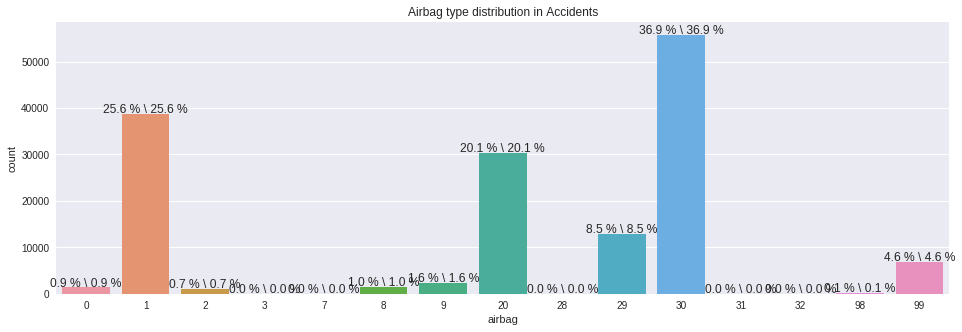

In [6]:
show_unique('airbag', data)
count_plot('airbag', 'x', data, 'show', 'Airbag type distribution in Accidents')

Img | Desc
- | -
![alt](img/airbag.png) |

In almost **36%** of the accidents airbag was not installed.

**25%** when front airbag deployed and **20%** when airbag was avaibale **didn't deploy**

### restraint: type of seatbelts installed in car for ex. only shoulder seatbelt


![alt](img/restraint.png)

There are 15 unique values in column restraint



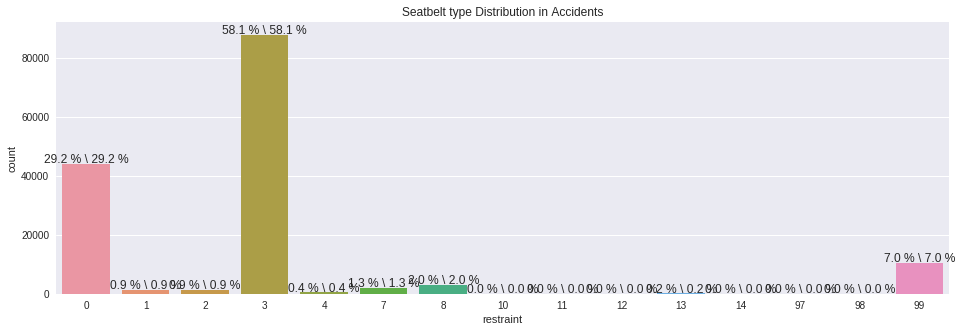

In [7]:
show_unique('restraint', data)
count_plot('restraint', 'x', data, 'show', 'Seatbelt type Distribution in Accidents')

In almost **58%** of accidents shoulder and lap belt was used and in **29%** of the accidents Belt was not applicable.

## Category Passenger and Driver:

### injury and D_injury: Category of  Injury

There are 7 unique values in column injury



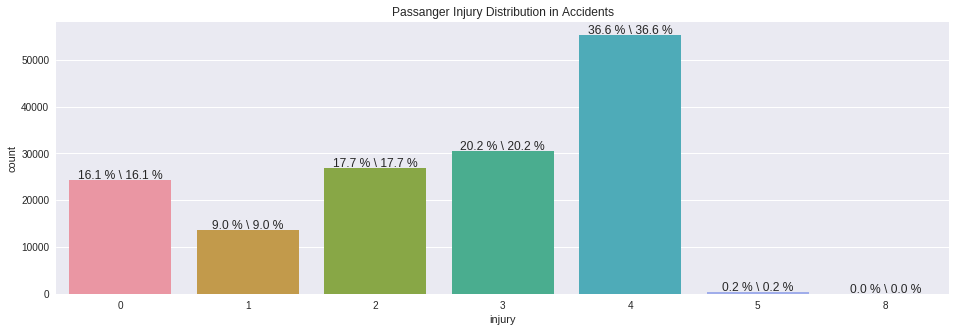

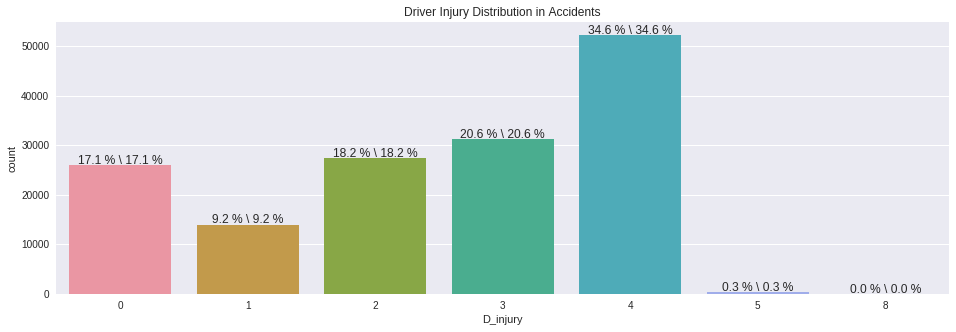

In [8]:
show_unique('injury', data)
count_plot('injury', 'x' , data, 'show', 'Passanger Injury Distribution in Accidents')
count_plot('D_injury', 'x', data, 'show', 'Driver Injury Distribution in Accidents')

**36%** of passengers and **34** have died with fatal Injury.

Desc | Desc
- | -
![alt](img/injury4.png) |![alt](img/injury1.png) ![alt](img/injury2.png)

### airbagAvail and D_airbagAvail:  air bag availability 

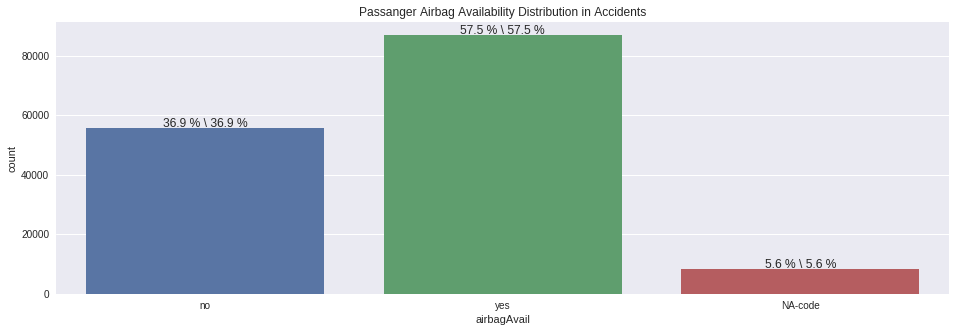

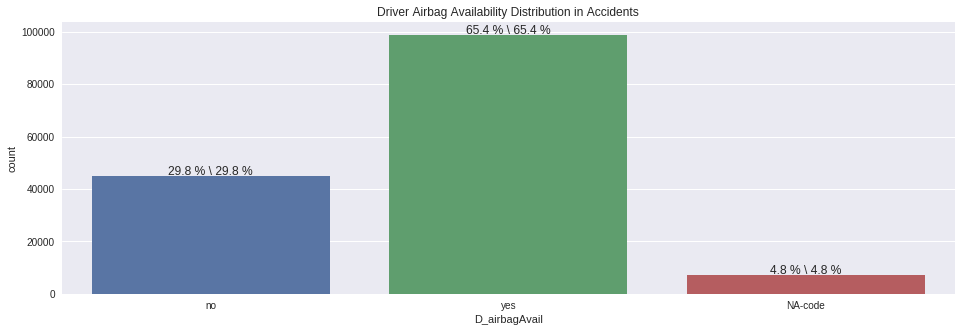

In [9]:
count_plot('airbagAvail','x', data, 'show', 'Passanger Airbag Availability Distribution in Accidents')
count_plot('D_airbagAvail', 'x', data, 'show', 'Driver Airbag Availability Distribution in Accidents')

### airbagDeploy and D_ airbagDeploy: air bag doployment 

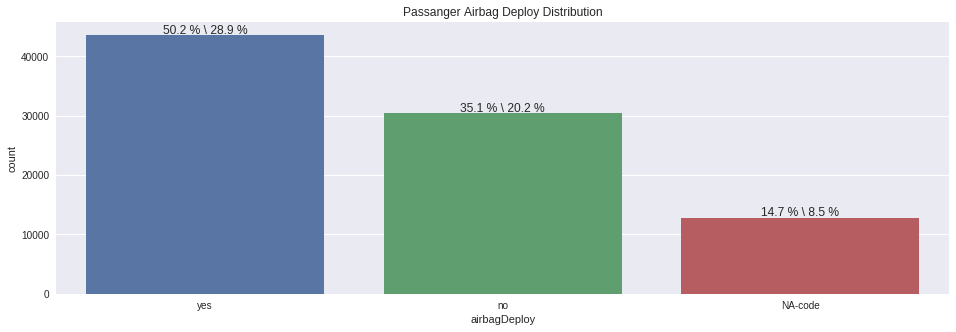

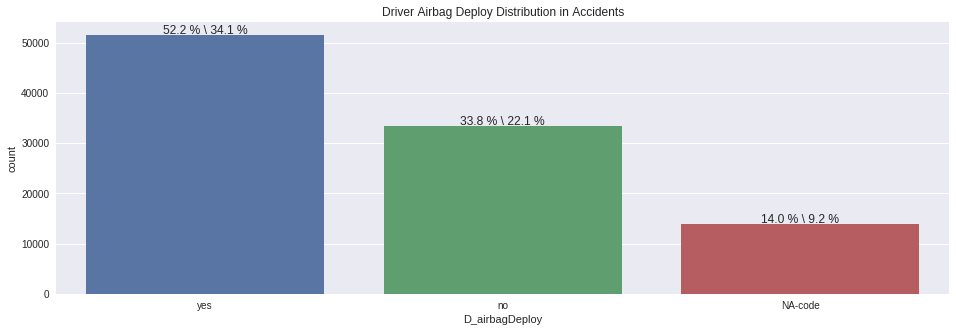

In [10]:
bag_deploy = data[data.airbagAvail == 'yes']
count_plot('airbagDeploy', 'x', bag_deploy, 'show', 'Passanger Airbag Deploy Distribution')
#for driver
bag_deploy = data[data.D_airbagAvail == 'yes']
count_plot('D_airbagDeploy', 'x', bag_deploy, 'show', 'Driver Airbag Deploy Distribution in Accidents')

### Restraint D_Restraint: wearnig seatbelt or not 

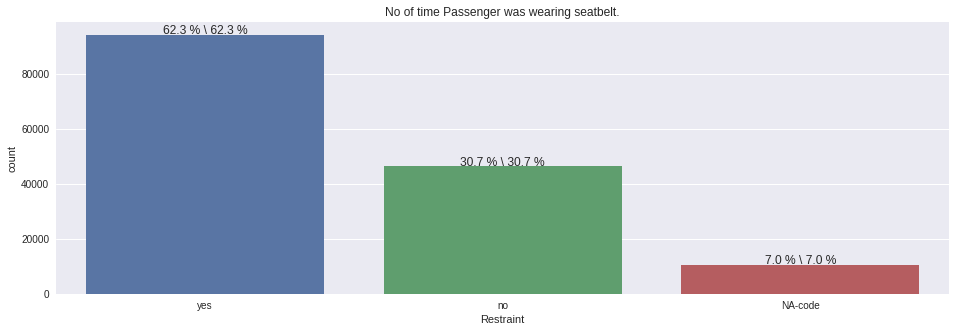

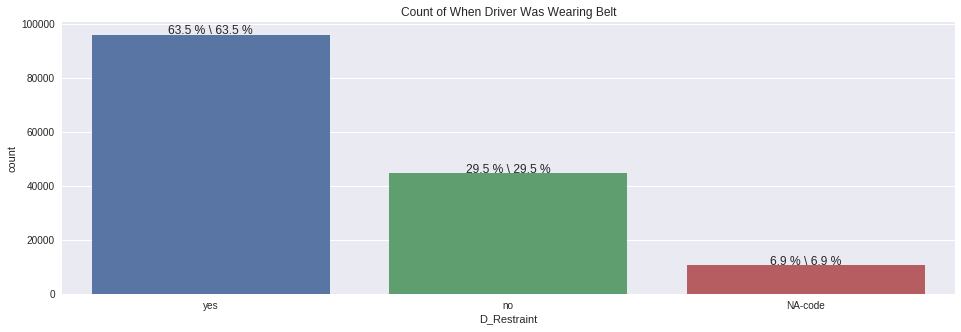

In [11]:
count_plot('Restraint', 'x', data, 'show', 'No of time Passenger was wearing seatbelt.')
count_plot('D_Restraint', 'x', data, 'show', 'Count of When Driver Was Wearing Belt')

### Category Other:

### year

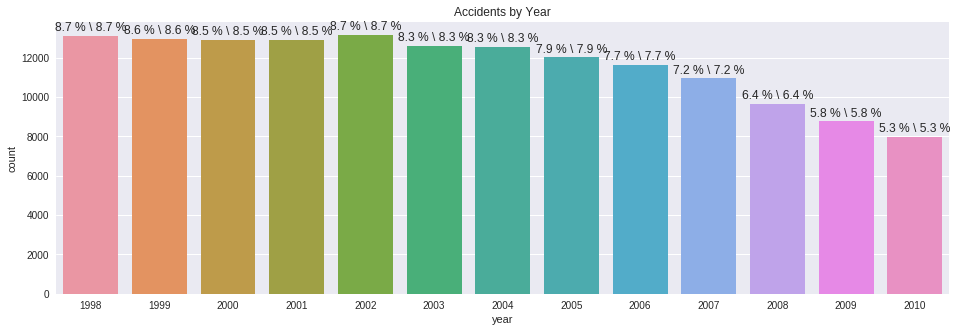

In [12]:
count_plot('year', 'x', data, 'show', 'Accidents by Year')

### state: state code of USA where accident happend

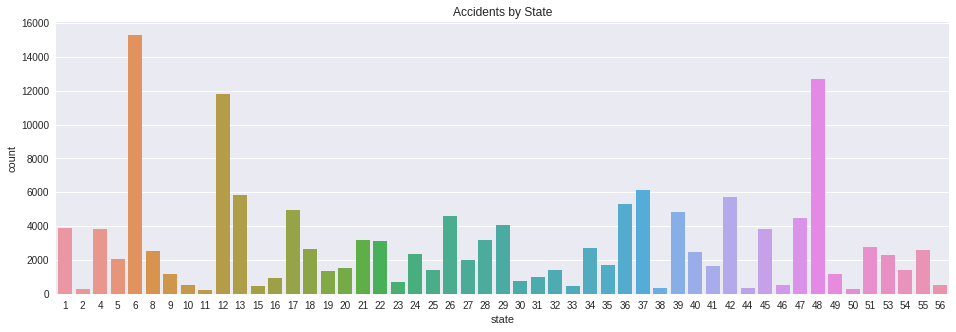

In [13]:
count_plot('state', 'x', data, 'notshow', 'Accidents by State')

![alt](img/state number.png)